# 기본 배열 처리 함수 + 채널처리 함수

기본 배열 처리 : cv2.flip(), cv2.repeat(), cv2.transpos()<br>
채널 처리 : cv2.split(), cv2.merge()

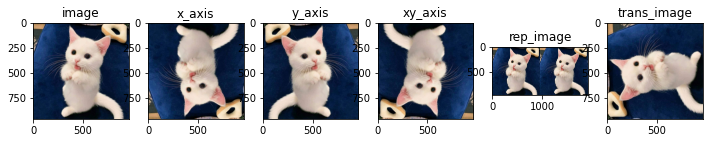

In [2]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('./cat11.jpg')

if image is None : 
    raise Exception("영상 파일 읽기 오류 발생 ")
    
x_axis = cv2.flip(image, 0) # 상하
y_axis = cv2.flip(image,1) #좌우
xy_axis = cv2.flip(image, -1) 
rep_image = cv2.repeat(image, 1,2) #반복 복사
trans_image = cv2.transpose(image) #행렬 전치 


b, g, r = cv2.split(image)
image_rgb = cv2.merge([r, g, b])

b, g, r = cv2.split(x_axis)
x_axis_rgb = cv2.merge([r, g, b])

b, g, r = cv2.split(y_axis)
y_axis_rgb = cv2.merge([r,g,b])

b, g, r = cv2.split(xy_axis)
xy_axis_rgb = cv2.merge([r,g,b])

b, g, r = cv2.split(rep_image)
rep_rgb = cv2.merge([r,g,b])

b, g, r = cv2.split(trans_image)
trans_rgb = cv2.merge([r,g,b])

images =[image_rgb, x_axis_rgb, y_axis_rgb, xy_axis_rgb, rep_rgb, trans_rgb]

titles = ['image','x_axis','y_axis','xy_axis', 'rep_image','trans_image']

#cv2를 이용한 출력
# for title in titles:
#     cv2.imshow(title, eval(title))

# cv2.waitKey(0)



plt.figure(figsize = (12,12))
for i in range(0, int(len(titles))):
    plt.subplot(1,6, i+1)
    plt.title(titles[i])
    plt.imshow(images[i])





## 채널 처리 함수 예제

In [3]:
import numpy as np
import cv2 

ch0 = np.zeros((2,4), np.uint8) +10 # 0으로 된 행렬에 10 더하기 
print(ch0)

ch1 = np.ones((2,4), np.uint8) *20 #1로 된 행렬에 20곱하기
print(ch1)

ch2 = np.full((2,4), 30, np.uint8) # 30으로 채운 행렬
print(ch2)

[[10 10 10 10]
 [10 10 10 10]]
[[20 20 20 20]
 [20 20 20 20]]
[[30 30 30 30]
 [30 30 30 30]]


In [4]:
list_bgr = [ch0, ch1, ch2]
merge_bgr = cv2.merge(list_bgr)
split_bgr = cv2.split(merge_bgr)

print("split_bgr 행렬 형태", np.array(split_bgr).shape)
print(np.array(split_bgr))
print("merge_bgr 행렬 형태", merge_bgr.shape)
print(merge_bgr)

split_bgr 행렬 형태 (3, 2, 4)
[[[10 10 10 10]
  [10 10 10 10]]

 [[20 20 20 20]
  [20 20 20 20]]

 [[30 30 30 30]
  [30 30 30 30]]]
merge_bgr 행렬 형태 (2, 4, 3)
[[[10 20 30]
  [10 20 30]
  [10 20 30]
  [10 20 30]]

 [[10 20 30]
  [10 20 30]
  [10 20 30]
  [10 20 30]]]


## 영상 채널 분리 

In [5]:
import cv2
image = cv2.imread('./cat11.jpg', cv2.IMREAD_COLOR)
if image is None : raise Exception("영상 파일 읽기 오류")
if image.ndim !=3 : raise Excetion("컬러영상 아님")
    
bgr = cv2.split(image)
b, g, r = bgr = cv2.split(image)

print("bgr 전체:",bgr)
print("b", b)
print("g", g)
print("r", r)

print('bgr 자료형', type(bgr), type(bgr[0]), type(bgr[0][0][0]))
print('bgr 원소개수', len(bgr))

bgr 전체: (array([[87, 88, 88, ..., 55, 53, 54],
       [87, 88, 89, ..., 55, 55, 56],
       [87, 88, 89, ..., 53, 55, 57],
       ...,
       [64, 64, 65, ..., 50, 45, 42],
       [64, 63, 62, ..., 52, 46, 42],
       [66, 65, 63, ..., 53, 47, 42]], dtype=uint8), array([[128, 129, 129, ...,  74,  72,  73],
       [128, 129, 130, ...,  74,  74,  75],
       [128, 129, 130, ...,  72,  74,  76],
       ...,
       [ 31,  31,  32, ...,  27,  25,  22],
       [ 31,  30,  29, ...,  29,  26,  22],
       [ 33,  32,  30, ...,  30,  27,  22]], dtype=uint8), array([[173, 174, 174, ...,  59,  57,  58],
       [173, 174, 175, ...,  59,  59,  60],
       [173, 174, 175, ...,  57,  59,  61],
       ...,
       [  5,   5,   6, ...,  11,   8,   5],
       [  5,   4,   3, ...,  13,   9,   5],
       [  7,   6,   4, ...,  14,  10,   5]], dtype=uint8))
b [[87 88 88 ... 55 53 54]
 [87 88 89 ... 55 55 56]
 [87 88 89 ... 53 55 57]
 ...
 [64 64 65 ... 50 45 42]
 [64 63 62 ... 52 46 42]
 [66 65 63 ... 53 47 4

In [6]:
# 각 채널 윈도우에 띄우기 
cv2.imshow('image', image)
cv2.imshow('blue', bgr[0])
cv2.imshow('green', bgr[1])
cv2.imshow('red', bgr[2])
cv2.waitKey(0)
cv2.destroyAllWindows()

# 사칙연산 

In [16]:
import numpy as np

m1 = np.full((3,6),10, np.uint8)
m2 = np.full((3,6),50, np.uint8)

m_mask = np.zeros(m1.shape, np.uint8) # 마스크 생성
m_mask[:, 3:] = 1 #관심 영역을 지정한 후 1을 할당 
print(m_mask)

m_add1 = cv2.add(m1, m2)
m_add2 = cv2.add(m1, m2, mask = m_mask)

#행렬 나눗셈 수행
m_div1 = cv2.divide(m1, m2)
m1 = m1.astype(np.float32) # 형변환
m2 = np.float32(m2)
m_div2 = cv2.divide(m1, m2)

titles = ['m1', 'm2', 'm_mask', 'm_add1', 'm_add2', 'm_div1', 'm_div2']
for title in titles:
    print("[%s] = \n%s \n"% (title, eval(title)))


[[0 0 0 1 1 1]
 [0 0 0 1 1 1]
 [0 0 0 1 1 1]]
[m1] = 
[[10. 10. 10. 10. 10. 10.]
 [10. 10. 10. 10. 10. 10.]
 [10. 10. 10. 10. 10. 10.]] 

[m2] = 
[[50. 50. 50. 50. 50. 50.]
 [50. 50. 50. 50. 50. 50.]
 [50. 50. 50. 50. 50. 50.]] 

[m_mask] = 
[[0 0 0 1 1 1]
 [0 0 0 1 1 1]
 [0 0 0 1 1 1]] 

[m_add1] = 
[[60 60 60 60 60 60]
 [60 60 60 60 60 60]
 [60 60 60 60 60 60]] 

[m_add2] = 
[[ 0  0  0 60 60 60]
 [ 0  0  0 60 60 60]
 [ 0  0  0 60 60 60]] 

[m_div1] = 
[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]] 

[m_div2] = 
[[0.2 0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2 0.2]
 [0.2 0.2 0.2 0.2 0.2 0.2]] 



# 영상 필터링
영상에서 필요한 정보만 통과시키고 원치 않는 정보는 걸러내는 작업


##  평균값 필터링 cv2.filter2D(src, -1, mask)

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

img  = cv2.imread('./cat11.jpg', cv2.IMREAD_GRAYSCALE)

kernel = np.array([[0,0,0],[0,1,-1],[0,0,0]])
output = cv2.filter2D(img, -1, kernel)

cv2.imshow("original", img)
cv2.imshow("filter2D", output)
cv2.waitKey()
cv2.destroyAllWindows()


In [19]:
img2 = img.copy()

kernel = np.array([[1/9, 1/9, 1/9],
                  [1/9, 1/9, 1/9],
                  [1/9, 1/9, 1/9]])  # 이게 실제로 픽셀마다 9로 나눈거 

dst = cv2.filter2D(img2, -1, kernel)
cv2.imshow('filter2D', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [20]:
import numpy as np
import cv2


img = cv2.imread('./cat11.jpg')
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img, -1, kernel)


cv2.imshow('Original', img)
cv2.imshow('Result', dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

## cv2.blur(src, ksize, dst)
cv2.blur(src, ksize, dst=None, anchor=None, borderType=None) -> dst

In [ ]:
import cv2


img = cv2.imread('./cat11.png')
blur = cv2.blur(img,(5,5))


cv2.imshow('Original', img)
cv2.imshow('Result', blur)

cv2.waitKey(0)
cv2.destroyAllWindows()

## cv2.GaussianBlur()
모든 픽셀에 똑같은 가중치를 부여했던 평균 블러링과 달리 가우시안 블러링은 중심에 있는 픽셀에 높은 가중치를 부여한다. 

In [22]:
import cv2
img = cv2.imread('./cat11.jpg', cv2.IMREAD_GRAYSCALE)

for sigma in range(1,6):
    img_blur = cv2.GaussianBlur(img, (0,0), sigma)
    desc = 'sigma = {}'.format(sigma)
    cv2.putText(dst, desc, (10,30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, 255, 1, cv2.LINE_AA)
    cv2.imshow('dst', dst)
    cv2.waitKey()

cv2.destroyAllWindows()

## cv2.medianBlur(img, ksize)
관심화소 주변으로 지정한 커널 크기(5 * 5) 내의 픽셀을 크기순으로 정렬한 후 중간값을 뽑아서 픽셀값으로 사용한다. 


In [23]:
import cv2

img_gray = cv2.imread('./cat11.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow("cat", img_gray)
img_mediblur = cv2.medianBlur(img_gray, 3)
cv2.imshow('median', img_mediblur)
cv2.waitKey(0)
cv2.destroyAllWindows()

## cv2.bilateralFilter()
양방향 필터. 가우시안 필터를 양쪽 방향으로 두번 한다고해서 이름이 붙여졌다. 평균 값 필터 또는 가우시안 필터는 에지 부근에서도 픽셀 값을 평탄하게 만드는 단점이 있다.


In [30]:
src = cv2.imread('cat11.jpg')
dst = cv2.bilateralFilter(src, -1, 50, 10)
cv2.imshow('ori', src)
cv2.imshow('dst', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [36]:
import cv2

src = cv2.imread("./wheat.png", cv2.IMREAD_COLOR)
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

sobel = cv2.Sobel(gray, cv2.CV_8U, 1, 0, 3) #소벨필터
laplacian = cv2.Laplacian(gray, cv2.CV_8U, ksize=3) #라플라시안 필터
canny = cv2.Canny(src, 100, 255) #캐니 엣지

cv2.imshow("sobel", sobel)
cv2.imshow("laplacian", laplacian)
cv2.imshow("canny", canny)
cv2.waitKey()
cv2.destroyAllWindows()

# 영상 밝기 조절

In [32]:
#그레이스케일 영상의 밝기 100만큼 증가 
import cv2 

img = cv2.imread('./cat2.jpg', cv2.IMREAD_GRAYSCALE)
dst1 = cv2.add(img, 100)
dst2 = img + 100

cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [35]:
#컬러 영상의 밝기 100만큼 증가 
import cv2
import numpy as np 
img2 = cv2.imread('./cat2.jpg')
dst1 = cv2.add(img2, (100, 100, 100, 0))
dst2 = np.clip(img2 + 100., 0, 255).astype(np.uint8)

cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 히스토그램 

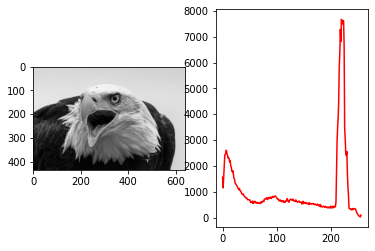

In [50]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./image/bald-eagle-5463386_640.jpg', 0)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#cv2.calcHist(images, channels, mask, histSize,  ranges)
hist = cv2.calcHist([img], [0], None, [256], [0,256])

plt.subplot(121),plt.imshow(img_rgb)
plt.subplot(122),plt.plot(hist, color='r')
plt.show()

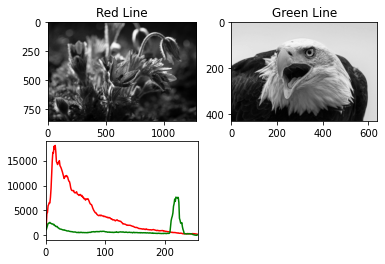

In [42]:
#-*- coding:utf-8 -*-
import cv2
import numpy as np
import random
from matplotlib import pyplot as plt

img1 = cv2.imread('image/anemone-5281964_1280.jpg',0)
img2 = cv2.imread('image/bald-eagle-5463386_640.jpg',0)

hist1 = cv2.calcHist([img1],[0],None,[256],[0,256])
hist2 = cv2.calcHist([img2],[0],None,[256],[0,256])

plt.subplot(221),plt.imshow(img1,'gray'),plt.title('Red Line')
plt.subplot(222),plt.imshow(img2,'gray'),plt.title('Green Line')
plt.subplot(223),plt.plot(hist1,color='r'),plt.plot(hist2,color='g')
plt.xlim([0,256])
plt.show()

## 컬러 영상 히스토그램 구하기 

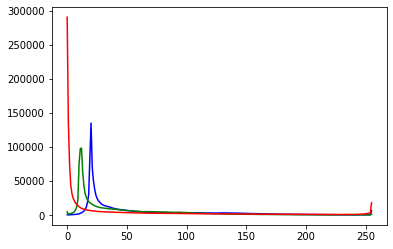

In [51]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('./image/photo-1480944657103-7fed22359e1d.jpg')
colors = ['b', 'g', 'r']
bgr_planes = cv2.split(img)

for (p,c) in zip(bgr_planes, colors):
    
    hist = cv2.calcHist([p], [0], None, [256],[0,256])
    plt.plot(hist, color = c)
    
plt.show()